In [21]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import blind

# 石野のブラインドの熱遮蔽特性の基礎理論

## 文献
伊藤直明、石野久彌、須永修通、三浦満男：開口部の熱遮断機構に関する研究　第１報　ブラインドの熱遮蔽特性の基礎理論、空気調和・衛生工学会学術論文集、1982.10、pp. 393-396
https://doi.org/10.18948/shasetaikai.1982.0_393

## 概要
スラっと面は完全拡散を想定する。水平ブラインドを無限に長い平板と仮定し、断面のみを考える。2次元の形態係数はCross Strings Formulaにより計算する。

## ライブラリ
math

## 計算方法
下記の図より面対面の形態係数を計算する。
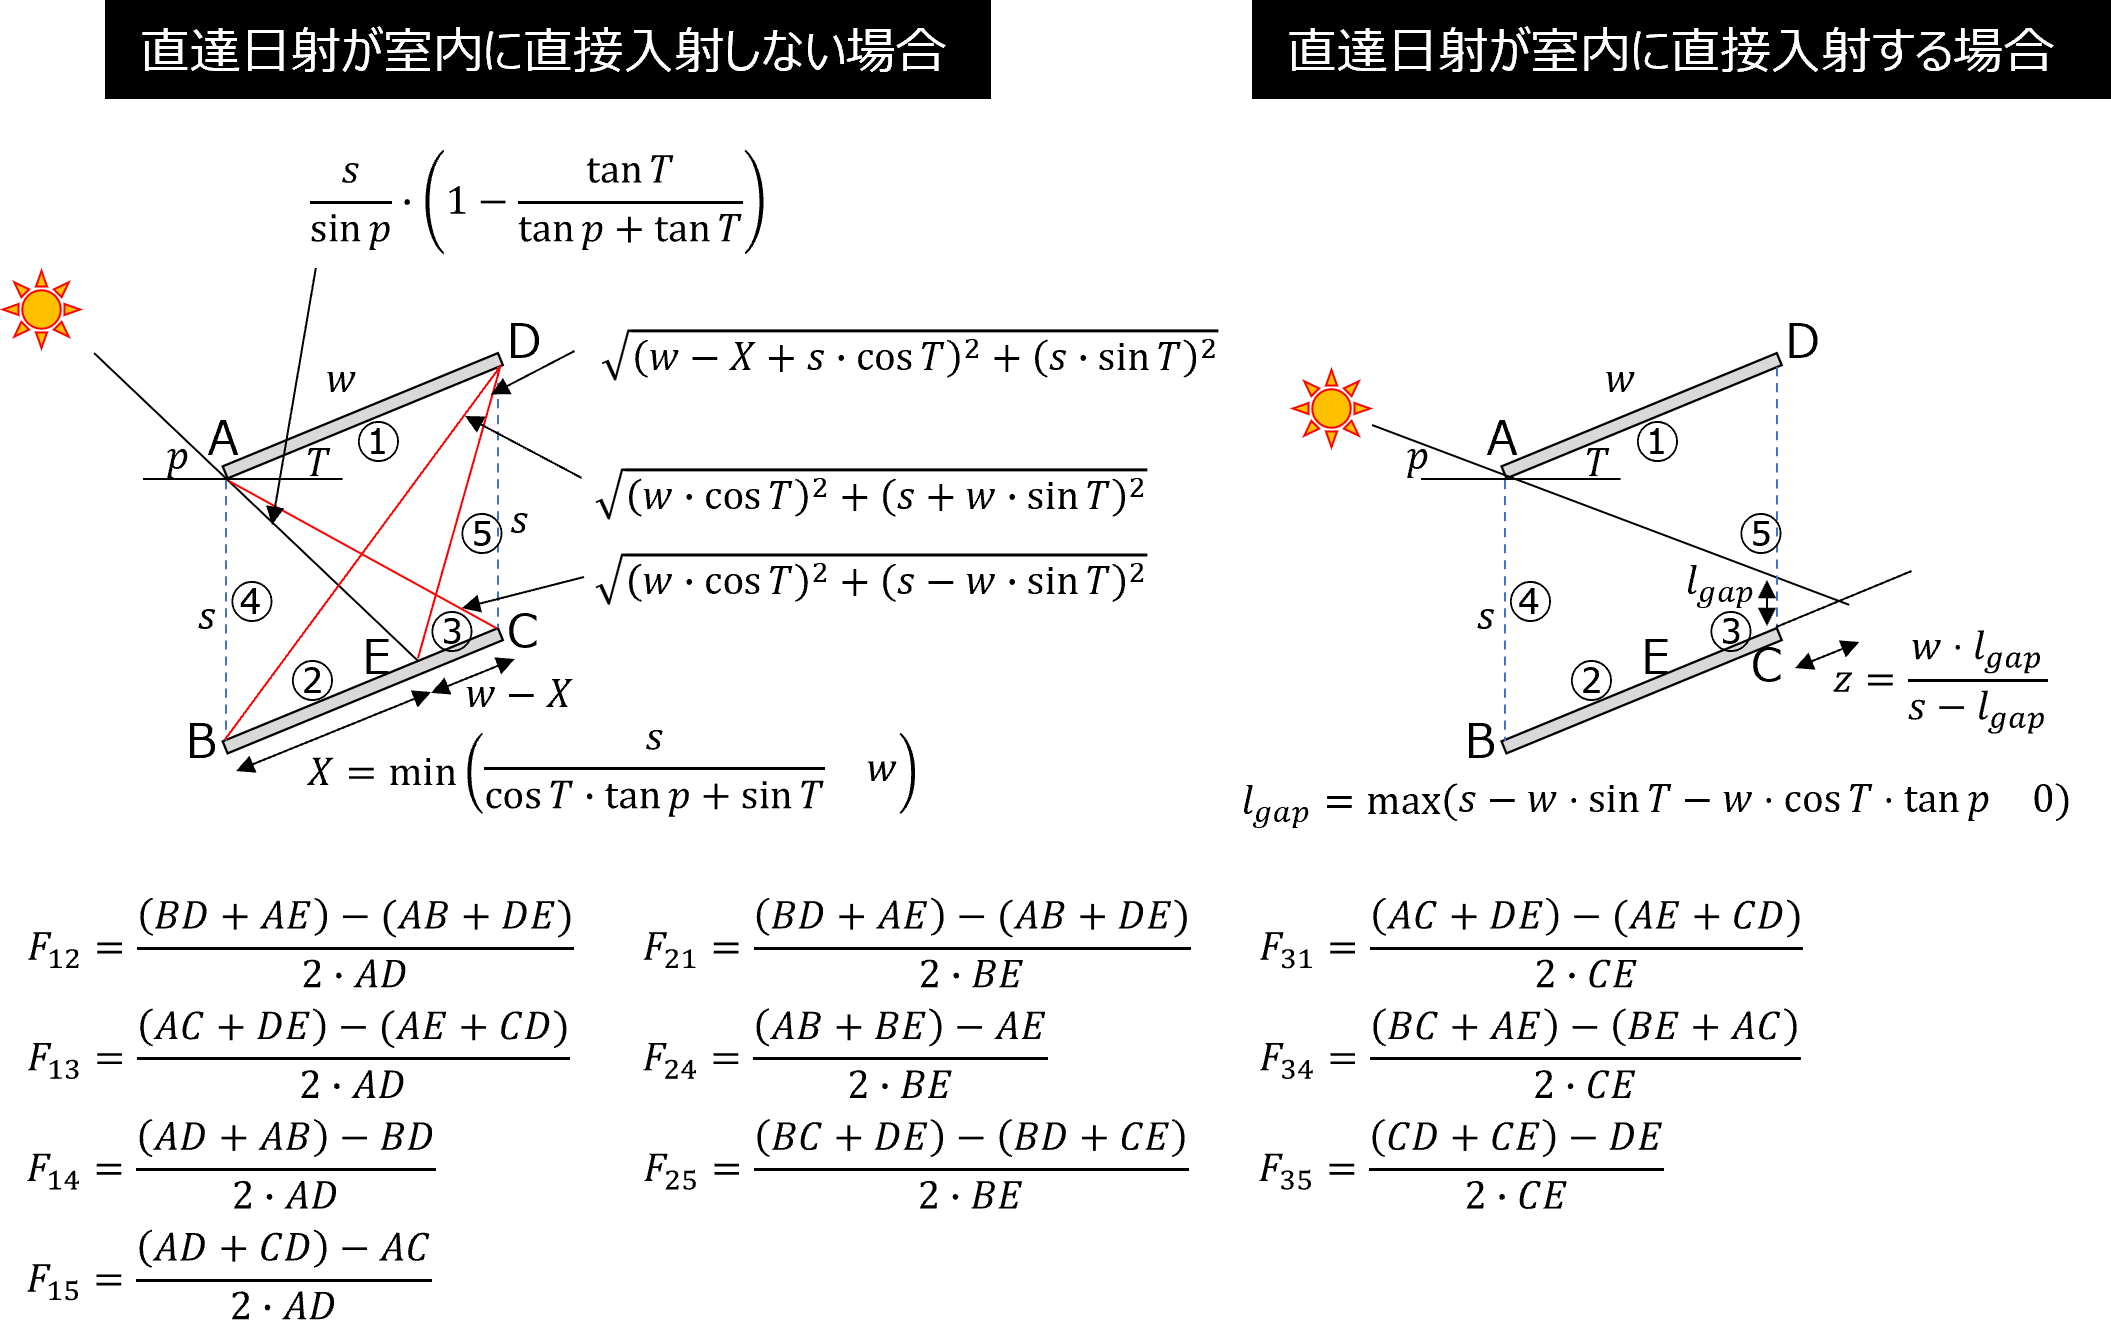

断面①～⑤に入射する日射量 $ q_1 $ ～ $ q_5 $　は次式で表せる。
$$ q_1=q_2 (1-a) F_{21}+q_3 (1-a) F_{31} $$
$$ q_2=1+q_1 (1-a) F_{12} $$
$$ q_3=q_1 (1-a) F_{12} $$
$$ q_4=\sum_{k=1}^3 q_k (1-a) F_{k4} $$
$$ q_5=\sum_{k=1}^3 q_k (1-a) F_{k5} $$

$ q_1 $ ～ $ q_5 $ を連立させて解いた $ q_5 $ にブラインドをすり抜ける日射量 $ l_{gap} $ を加えたものがブラインドの日射透過率 $ \tau $ 、$ q_4 $ がブラインドの日射反射率 $ \rho $ となる。
$$ \tau=(1-a) (F_{25}+\frac {(1-a)^2 F_{21} (F_{12} F_{25}+F_{13} F_{35})+(1-a) F_{21} F_{15}} {1-(1-a)^2 (F_{12} F_{21}+F_{13} F_{31})})+l_{gap} $$
$$ \rho=(1-a) (F_{24}+\frac {(1-a)^2 F_{21} (F_{12} F_{24}+F_{13} F_{34})+(1-a) F_{21} F_{14}} {1-(1-a)^2 (F_{12} F_{21}+F_{13} F_{31})})+l_{gap} $$

In [22]:
# 透過率、反射率の計算
trance, tau_pass_through, reflect = blind.calc_blind_transmittance(slat_absorption=0.5, slat_width=25, slat_spacing=21.5,
                                profile_angle_rad=math.radians(10), slat_angle_rad=math.radians(0))

print(trance, tau_pass_through, reflect)

0.8309615189885697 0.7949686270831802 0.03599289190538953


In [23]:
slat_absorption_array = np.arange(start=0.0, stop=1.05, step=0.05)
profile_angle_array = np.array([10, 20, 30, 40, 50, 60, 90], dtype=float)

In [24]:
def draw_scatter(df_result: pd.DataFrame, y_label: str):

    for profile_angle in profile_angle_array:
        plt.scatter(
                x=df_result['slat_absorption'],
                y=df_result[str(profile_angle)],
                label=str(profile_angle),
                marker='o'
                )
        
    plt.xlabel('slat_absorption')
    plt.ylabel(y_label)
    plt.ylim(0, 1)
    plt.yticks(np.arange(start=0, stop=1.1, step=0.1))
    plt.grid(True)
    plt.legend()
    plt.show()

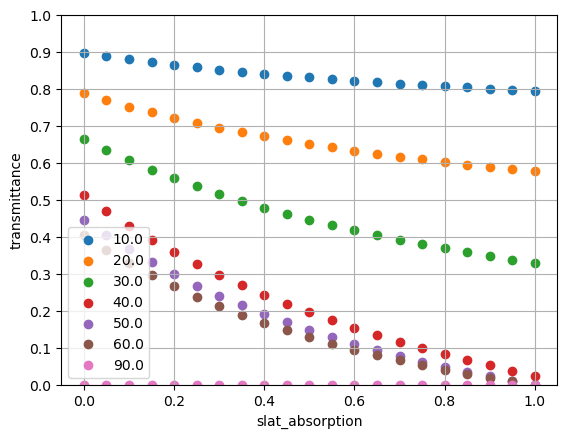

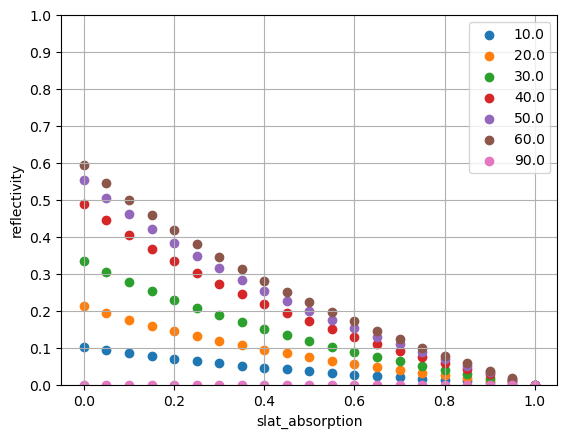

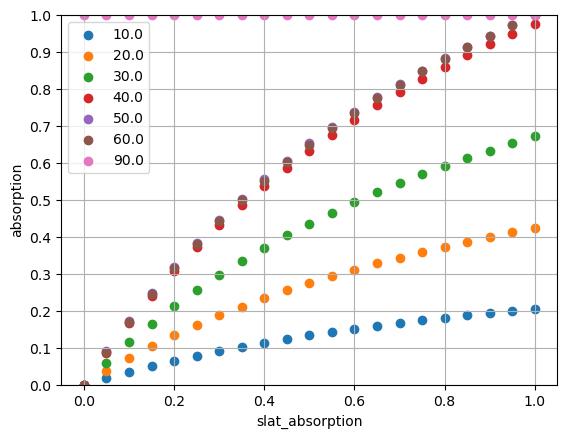

In [25]:
df_result_trance = pd.DataFrame(columns=np.insert(np.array(profile_angle_array, dtype="<U"), 0, 'slat_absorption'))
df_result_ref = pd.DataFrame(columns=np.insert(np.array(profile_angle_array, dtype="<U"), 0, 'slat_absorption'))
df_result_abosorp = pd.DataFrame(columns=np.insert(np.array(profile_angle_array, dtype="<U"), 0, 'slat_absorption'))

for profile_angle in profile_angle_array:
    i = 0
    for slat_absorption in slat_absorption_array:
        trance, tau_pass_through, reflect = blind.calc_blind_transmittance(
            slat_absorption=slat_absorption,
            slat_spacing=21.5,
            slat_width=25,
            profile_angle_rad=math.radians(profile_angle),
            slat_angle_rad=math.radians(0)
        )
        
        df_result_trance.at[i, 'slat_absorption'] = slat_absorption
        df_result_ref.at[i, 'slat_absorption'] = slat_absorption 
        df_result_abosorp.at[i, 'slat_absorption'] = slat_absorption 
        df_result_trance.at[i, str(profile_angle)] = trance
        df_result_ref.at[i, str(profile_angle)] = reflect
        df_result_abosorp.at[i, str(profile_angle)] = 1.0 - trance - reflect

        i += 1

draw_scatter(df_result=df_result_trance, y_label='transmittance')
draw_scatter(df_result=df_result_ref, y_label='reflectivity')
draw_scatter(df_result=df_result_abosorp, y_label='absorption')